In [2]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install selenium webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install selenium webdriver-manager

Note: you may need to restart the kernel to use updated packages.


# **Preparación de la información**

## **1. FASE DE PREPARACIÓN: GENERACIÓN DEL CATÁLOGO**

In [13]:
import csv

# Datos extraídos previamente de SENAMHI (snapshot)
DATA_RAW = [
    "AMAZONAS_EL PINTOR", "AMAZONAS_MAGUNCHAL", "ANCASH_OCROS", "ANCASH_RECUAY", 
    "ANCASH_MAYORARCA", "ANCASH_SIHUAS", "ANCASH_BUENA VISTA", "ANCASH_PIRA", 
    "ANCASH_CHACCHAN", "ANCASH_MILPO", "APURIMAC_CURAHUASI", "AREQUIPA_MADRIGAL", 
    "AREQUIPA_IMATA", "AREQUIPA_PILLONES", "AREQUIPA_SIBAYO", "AREQUIPA_YANAQUIHUA", 
    "AREQUIPA_PULLHUAY (AYAHUASI)", "AREQUIPA_COTAHUASI", "AREQUIPA_PAMPA BLANCA", 
    "AREQUIPA_SALAMANCA", "AREQUIPA_MACHAHUAY", "AREQUIPA_CHOCO", "AREQUIPA_CHACHAS", 
    "AREQUIPA_AYO", "AREQUIPA_ANDAHUA", "AREQUIPA_APLAO", "AREQUIPA_PUNTA ATICO", 
    "AREQUIPA_CARAVELI", "AREQUIPA_LA JOYA", "AREQUIPA_PAMPA DE MAJES", "AREQUIPA_HUAMBO", 
    "AREQUIPA_LA ANGOSTURA", "AREQUIPA_CHIVAY", "AREQUIPA_ORCOPAMPA", "AREQUIPA_EL FRAYLE", 
    "AREQUIPA_CHIGUATA", "AREQUIPA_LAS SALINAS", "AREQUIPA_LA PAMPILLA", "AREQUIPA_CHICHAS", 
    "AREQUIPA_PORPERA", "AYACUCHO_PUQUIO", "AYACUCHO_CORACORA", "AYACUCHO_LAMPA", 
    "AYACUCHO_VILCASHUAMAN", "AYACUCHO_CHILCAYOC", "AYACUCHO_PAUZA", "AYACUCHO_LUCANAS", 
    "AYACUCHO_HUAC-HUAS", "AYACUCHO_LLAUTA", "CAJAMARCA_CUTERVO", "CAJAMARCA_QUEROCOTILLO", 
    "CAJAMARCA_QUEBRADA SHUGAR", "CAJAMARCA_CHUGUR", "CAJAMARCA_LA CASCARILLA", 
    "CAJAMARCA_CHONTALI", "CAJAMARCA_EL LIMON", "CAJAMARCA_HACIENDA PUCARA", 
    "CAJAMARCA_SALLIQUE", "CAJAMARCA_TOCMOCHE", "CAJAMARCA_LLAMA", "CAJAMARCA_CHOTANO LAJAS", 
    "CAJAMARCA_COCHABAMBA", "CAJAMARCA_CACHACHI", "CAJAMARCA_CAJABAMBA", "CAJAMARCA_SAN JUAN", 
    "CAJAMARCA_ASUNCION", "CAJAMARCA_AUGUSTO WEBERBAUER", "CAJAMARCA_SAN BENITO", 
    "CAJAMARCA_CHILETE", "CAJAMARCA_CHIRINOS", "CAJAMARCA_TABACONAS", "CAJAMARCA_SAN MARCOS", 
    "CAJAMARCA_LIVES", "CAJAMARCA_UDIMA", "CAJAMARCA_CHANCAY BAÑOS", "CUSCO_GRANJA KCAYRA", 
    "CUSCO_ACOMAYO", "CUSCO_POMACANCHI", "CUSCO_PISAC", "CUSCO_PARURO", "CUSCO_CAY CAY", 
    "CUSCO_COLQUEPATA", "CUSCO_CCATCCA", "HUANCAVELICA_HUANCALPI", "HUANCAVELICA_ACOBAMBA", 
    "HUANCAVELICA_LIRCAY", "HUANCAVELICA_HUACHOS", "HUANCAVELICA_SAN JUAN DE CASTROVIRREYNA", 
    "HUANCAVELICA_CHOCLOCOCHA", "HUANCAVELICA_CORDOVA", "HUANCAVELICA_TUNEL CERO", 
    "HUANCAVELICA_SANTIAGO DE CHOCORVOS", "HUANCAVELICA_TAMBO", "HUANCAVELICA_ACOSTAMBO", 
    "HUANCAVELICA_SALCABAMBA", "HUANUCO_CANCHAN", "HUANUCO_HUANUCO", "HUANUCO_SAN RAFAEL", 
    "HUANUCO_TINGO MARIA", "HUANUCO_TULUMAYO", "ICA_SAN CAMILO", "ICA_HACIENDA BERNALES", 
    "ICA_PAMPA BLANCA", "ICA_RIO GRANDE", "ICA_OCUCAJE", "ICA_HUAMANI", "ICA_FONAGRO (CHINCHA)", 
    "ICA_SAN JUAN DE YANAC", "ICA_COPARA", "JUNIN_SANTA ANA", "JUNIN_VIQUES", "JUNIN_INGENIO", 
    "JUNIN_RICRAN", "JUNIN_CARHUACAYAN", "JUNIN_HUAYAO", "JUNIN_YANTAC", "JUNIN_JAUJA", 
    "LA LIBERTAD_JULCAN", "LA LIBERTAD_CALLANCAS", "LA LIBERTAD_SINSICAP", 
    "LA LIBERTAD_HUAMACHUCO", "LA LIBERTAD_CACHICADAN", "LA LIBERTAD_HUACAMARCANGA", 
    "LA LIBERTAD_QUIRUVILCA", "LA LIBERTAD_MOLLEPATA", "LA LIBERTAD_HUANGACOCHA", 
    "LA LIBERTAD_TALLA (GUADALUPE)", "LAMBAYEQUE_REQUE", "LAMBAYEQUE_CAYALTI", 
    "LAMBAYEQUE_CUEVA BLANCA", "LAMBAYEQUE_JAYANCA (LA VIÑA)", "LAMBAYEQUE_VIRREY", 
    "LAMBAYEQUE_LAMBAYEQUE", "LAMBAYEQUE_PUCHACA", "LAMBAYEQUE_EL ESPINAL", "LIMA_GORGOR", 
    "LIMA_CANTA", "LIMA_ARAHUAY", "LIMA_ÑAÑA", "LIMA_CHOSICA", "LIMA_HUARANGAL", 
    "LIMA_ANDAJES", "LIMA_OYON", "LIMA_SANTA ROSA", "LIMA_PARQUIN", "LIMA_PICOY", 
    "LIMA_PACCHO", "LIMA_PACHAMACHAY", "LIMA_ALCANTARILLA", "LIMA_RIO BLANCO", "LIMA_TANTA", 
    "LIMA_SAN PEDRO DE PILAS", "LIMA_HUAÑEC", "LIMA_VILCA", "LIMA_CARANIA", "LIMA_AYAVIRI", 
    "LIMA_YAURICOCHA", "LIMA_SHEQUE", "LIMA_CARAMPOMA", "LIMA_ANTIOQUIA", "LIMA_MATUCANA", 
    "LIMA_SANTA CRUZ", "LIMA_HUAMANTANGA", "LIMA_HUAROS", "LIMA_PARIACANCHA", "LIMA_PAMPA LIBRE", 
    "LIMA_LOMAS DE LACHAY", "LIMA_SANTIAGO DE TUNA", "LIMA_SANTA EULALIA", "LIMA_CANCHACALLA", 
    "LIMA_HUANCATA", "LIMA_AUTISHA", "LIMA_SAN LAZARO DE ESCOMARCA", "LIMA_LANGA", 
    "LIMA_LACHAQUI", "LIMA_CAÑETE", "LIMA_PACARAN", "LIMA_HUAYAN", "LIMA_DONOSO", "LIMA_PIRCA", 
    "LIMA_PALLAC", "LORETO_PUNCHANA", "LORETO_MANITI", "LORETO_TIMICURILLO", 
    "LORETO_FRANCISCO ORELLANA", "LORETO_BELLAVISTA", "LORETO_LA LIBERTAD", "LORETO_SANTA CRUZ", 
    "LORETO_SANTA MARIA DE NANAY", "LORETO_MAZAN", "LORETO_SHANUSI", "LORETO_SAN RAMON", 
    "LORETO_BAGAZAN", "LORETO_SANTA RITA DE CASTILLA", "LORETO_SANTA ROSA", "LORETO_BRETAÑA", 
    "LORETO_GENARO HERRERA", "LORETO_JUANCITO", "MOQUEGUA_MOQUEGUA", "MOQUEGUA_QUINISTAQUILLAS", 
    "MOQUEGUA_CALACOA", "MOQUEGUA_ICHUÑA", "MOQUEGUA_UBINAS", "MOQUEGUA_PUNTA COLES", 
    "MOQUEGUA_ILO", "PIURA_MIRAFLORES", "PIURA_SAN MIGUEL", "PIURA_AYABACA", 
    "PIURA_SAUSAL DE CULUCAN", "PIURA_SAPILLICA", "PIURA_PORCULLA", "PIURA_HUARMACA", 
    "PIURA_HACIENDA SHUMAYA", "PIURA_SONDORILLO", "PIURA_TULUCE", "PIURA_SAN PEDRO", 
    "PIURA_CHULUCANAS", "PIURA_MORROPON", "PIURA_HACIENDA BIGOTE", "PIURA_LA ESPERANZA", 
    "PIURA_LANCONES", "PIURA_MALLARES", "PIURA_PANANGA", "PIURA_CHUSIS", "PIURA_BERNAL", 
    "PUNO_PUNO", "PUNO_ISLA TAQUILE", "PUNO_CAPACHICA", "PUNO_AZANGARO", "PUNO_ARAPA", 
    "PUNO_PROGRESO", "PUNO_MUÑANI", "PUNO_CRUCERO", "PUNO_JULI", "PUNO_DESAGUADERO", 
    "PUNO_PIZACOMA", "PUNO_ILAVE", "PUNO_CAPAZO", "PUNO_MAZO CRUZ", "PUNO_HUANCANE", 
    "PUNO_COJATA", "PUNO_LAMPA", "PUNO_PAMPAHUTA", "PUNO_PUCARA", "PUNO_CRUCERO ALTO", 
    "PUNO_AYAVIRI", "PUNO_SANTA ROSA", "PUNO_CHUQUIBAMBILLA", "PUNO_HUARAYA MOHO", "PUNO_PUTINA", 
    "PUNO_ANANEA", "PUNO_CABANILLAS", "PUNO_CUYO CUYO", "PUNO_TAHUACO - YUNGUYO", "PUNO_ISLA SUANA", 
    "TACNA_JORGE BASADRE", "TACNA_CALANA", "TACNA_SAMA GRANDE", "TACNA_TOQUELA", "TACNA_PALCA", 
    "TACNA_PAUCARANI", "TACNA_LOCUMBA", "TACNA_CHUAPALCA", "TACNA_TARATA", "TACNA_TALABAYA", 
    "TACNA_SITAJARA", "TACNA_SUSAPAYA", "TACNA_CHALLAPALCA", "TUMBES_PUERTO PIZARRO", 
    "TUMBES_EL TIGRE", "TUMBES_EL SALTO", "TUMBES_MATAPALO", "UCAYALI_EL MARONAL"
]

def generar_csv_estaciones():
    print("Generando archivo 'lista_estaciones_senamhi.csv'...")
    
    data_procesada = []
    for item in DATA_RAW:
        partes = item.split('_', 1)
        if len(partes) == 2:
            data_procesada.append({
                "departamento": partes[0],
                "estacion": partes[1],
                "codigo_completo": item
            })
            
    with open('lista_estaciones_senamhi.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=["departamento", "estacion", "codigo_completo"])
        writer.writeheader()
        writer.writerows(data_procesada)
        
    print(f"¡Listo! {len(data_procesada)} estaciones exportadas.")

if __name__ == "__main__":
    generar_csv_estaciones()

Generando archivo 'lista_estaciones_senamhi.csv'...
¡Listo! 273 estaciones exportadas.


## **2. FASE DE ANÁLISIS: MOTOR DE DETECCIÓN DE NIEVE**

In [9]:
import pandas as pd
import os

def analizar_nieve_local(ruta_archivo):
    print(f"--- Procesando archivo: {ruta_archivo} ---")
    
    try:
        # El SENAMHI suele entregar archivos de texto separados por tabulaciones, comas o espacios.
        # Este comando intenta detectar automáticamente la estructura.
        # 'sep=None' usa el motor de python para detectar el separador.
        # 'skiprows' salta las primeras lineas si tienen metadatos (ajustar si es necesario)
        df = pd.read_csv(ruta_archivo, sep=None, engine='python')
        
        # Limpieza de nombres de columnas (quita espacios extra)
        df.columns = [c.strip().upper() for c in df.columns]
        print("Columnas encontradas:", df.columns.tolist())

        # Buscamos columnas clave (T.Minima y Precipitacion)
        # Nombres comunes en SENAMHI: 'MIN', 'TMIN', 'PRECIP', 'PP'
        col_min = next((c for c in df.columns if c in ['MIN', 'TMIN', 'TEMP MIN', 'T.MIN']), None)
        col_precip = next((c for c in df.columns if c in ['PRECIP', 'PP', 'LLUVIA', 'PLUVIOMETRIA']), None)
        col_fecha = next((c for c in df.columns if c in ['FECHA', 'DIA', 'DATE']), None)

        if not col_min or not col_precip:
            print("⚠️ Error: No encontré las columnas de Temperatura Mínima o Precipitación.")
            print("Por favor abre el archivo y dime cómo se llaman los encabezados.")
            return

        # Convertir datos a números (los errores 'S/D' se vuelven NaN)
        df[col_min] = pd.to_numeric(df[col_min], errors='coerce')
        df[col_precip] = pd.to_numeric(df[col_precip], errors='coerce')

        # === LÓGICA DE NIEVE ===
        # Regla: Si llovió (Precip > 0) Y la temperatura mínima fue muy baja (<= 2°C)
        def detectar_fenomeno(row):
            t = row[col_min]
            p = row[col_precip]
            
            if pd.isna(t) or pd.isna(p): return "Sin Datos"
            
            if p > 0:
                if t <= 1.0: return "❄️ NIEVE (Alta prob.)"
                elif t <= 3.0: return "💧 AGUANIEVE"
                else: return "🌧️ Lluvia líquida"
            return "☁️ Seco"

        df['CONDICION'] = df.apply(detectar_fenomeno, axis=1)

        # Filtramos solo los días de interés
        nieve = df[df['CONDICION'].str.contains("NIEVE|AGUANIEVE")]

        if not nieve.empty:
            print(f"\n✅ ¡Se encontraron {len(nieve)} eventos de nieve/aguanieve!")
            cols_mostrar = [col for col in [col_fecha, col_min, col_precip, 'CONDICION'] if col]
            print(nieve[cols_mostrar].to_string(index=False))
            
            # Guardar reporte
            nieve.to_csv("reporte_nieve.csv", index=False)
            print("\nReporte guardado en 'reporte_nieve.csv'")
        else:
            print("\nNo se detectaron condiciones de nieve en este archivo.")

    except Exception as e:
        print(f"Error leyendo el archivo: {e}")

# --- EJECUCIÓN ---
# Asegúrate de poner el nombre correcto de tu archivo descargado aquí:
archivo_descargado = 'datos_senamhi.txt' 

# Crea un archivo dummy de prueba si no existe, para que veas que funciona
if not os.path.exists(archivo_descargado):
    with open(archivo_descargado, 'w') as f:
        f.write("FECHA,TMIN,PP\n2023-01-01,5.0,0\n2023-06-15,-2.0,5.0\n2023-07-20,0.5,2.0\n")
    print("(Creé un archivo de prueba automático para la demostración)")

analizar_nieve_local(archivo_descargado)

--- Procesando archivo: datos_senamhi.txt ---
Columnas encontradas: ['FECHA', 'TMIN', 'PP']

✅ ¡Se encontraron 2 eventos de nieve/aguanieve!
     FECHA  TMIN  PP             CONDICION
2023-06-15  -2.0 5.0 ❄️ NIEVE (Alta prob.)
2023-07-20   0.5 2.0 ❄️ NIEVE (Alta prob.)

Reporte guardado en 'reporte_nieve.csv'


### **3. FASE DE SIMULACIÓN: GENERADOR DE ESCENARIOS**

In [17]:
import os

nombre_archivo = 'datos_senamhi.txt'

# Sobrescribimos el archivo con datos mixtos (Lluvia, Nieve y Seco)
with open(nombre_archivo, 'w') as f:
    f.write("FECHA,TMIN,PP\n")
    f.write("2023-01-05,12.0,0.0\n")   # Seco
    f.write("2023-02-14,14.5,15.0\n")  # ✅ Lluvia Moderada (T=14°C)
    f.write("2023-02-15,13.0,2.5\n")   # ✅ Lluvia Ligera (T=13°C)
    f.write("2023-06-20,-1.0,5.0\n")   # ❄️ Nieve (Se ignorará)
    f.write("2023-03-10,18.0,45.0\n")  # ✅ Lluvia Fuerte (T=18°C)

print(f"Archivo '{nombre_archivo}' actualizado con datos de lluvia.")

Archivo 'datos_senamhi.txt' actualizado con datos de lluvia.


## **4. FASE DE INTEGRACIÓN: CLASIFICADOR FINAL**

In [19]:
import pandas as pd
import os

# 1. CREAMOS EL ARCHIVO CON DATOS VARIADOS
datos = [
    ["2023-01-05",  15.0,  10.0], # Lluvia
    ["2023-02-14",  12.5,  25.0], # Lluvia fuerte
    ["2023-06-15",  -3.0,   5.0], # Nieve
    ["2023-06-20",   0.5,   8.0], # Nieve
    ["2023-07-01",  -5.0,   0.0], # Seco
    ["2023-09-10",   8.0,   2.0], # Lluvia debil
    ["2023-12-24",   1.8,  12.0]  # Nieve/Aguanieve
]

df = pd.DataFrame(datos, columns=["FECHA", "TMIN", "PP"])

# 2. CLASIFICAMOS CADA DÍA
def definir_clima(fila):
    temp = fila["TMIN"]
    lluvia = fila["PP"]
    
    if lluvia > 0:
        if temp <= 2.0: # Umbral de frío
            return "❄️ NIEVE"
        else:
            return "🌧️ LLUVIA"
    else:
        return "☁️ SECO"

df["RESULTADO"] = df.apply(definir_clima, axis=1)

# 3. MOSTRAMOS LA LISTA FINAL
print("--- LISTA CLASIFICADA ---")
print(df.to_string(index=False))

# (Opcional) Guardar en Excel/CSV
df.to_csv("reporte_final_clasificado.csv", index=False)

--- LISTA CLASIFICADA ---
     FECHA  TMIN   PP RESULTADO
2023-01-05  15.0 10.0 🌧️ LLUVIA
2023-02-14  12.5 25.0 🌧️ LLUVIA
2023-06-15  -3.0  5.0  ❄️ NIEVE
2023-06-20   0.5  8.0  ❄️ NIEVE
2023-07-01  -5.0  0.0   ☁️ SECO
2023-09-10   8.0  2.0 🌧️ LLUVIA
2023-12-24   1.8 12.0  ❄️ NIEVE


# **Web scraping**

## **SECCIÓN 1: INTELIGENCIA DE RED Y EXTRACCIÓN**

In [62]:
def detectar_api_oculta():
    url_mapa = "https://www.senamhi.gob.pe/mapas/mapa-estaciones-2/"
    # Configura Selenium para escuchar logs de 'Performance'
    options.set_capability("goog:loggingPrefs", {"performance": "ALL"})
    
    # Intercepta respuestas de red tipo JSON/Texto
    for entry in logs:
        if "Network.responseReceived" in message:
            url_detectada = message["params"]["response"]["url"]
            # Filtra la URL que contiene las coordenadas ocultas
            if "senamhi.gob.pe" in url_detectada and filtro_json:
                 candidatos.append(url_detectada)

## **SECCIÓN 2: MINERÍA Y ESTRUCTURACIÓN (The Parser)**

In [64]:
def extraer_estaciones_definitivo():
    # Patrón Regex descubierto mediante análisis forense
    # Captura: Nombre, Latitud, Longitud, Código y Estado
    regex = r'"nom":\s*"(.*?)".*?"lat":\s*(-?\d+\.\d+).*?"lon":\s*(-?\d+\.\d+)'
    
    matches = re.findall(regex, contenido)
    
    # Transforma texto crudo en Estructura de Datos (DataFrame)
    for nombre, lat, lon in matches:
        datos_limpios.append({
            "ESTACION": nombre.strip(),
            "LATITUD": float(lat),
            "LONGITUD": float(lon),
            "TIPO_REPORTE": estado.strip()
        })
    
    # Genera el activo más valioso: El CSV Maestro
    df.to_csv("MAESTRO_ESTACIONES_SENAMHI_GEO.csv", index=False)

## **SECCIÓN 3: CORRELACIÓN GEOESPACIAL (The Linker)**

In [68]:
def haversine(lon1, lat1, lon2, lat2):
    """Calcula la distancia precisa sobre una esfera (La Tierra)"""
    # ... Fórmula trigonométrica compleja ...
    return c * 6371 # Radio Tierra en KM

def asignar_estacion_a_vuelo(lat_avion, lon_avion, df_estaciones):
    # Optimización: Filtra estaciones lejanas para ahorrar cálculo
    candidatas = df_estaciones[filtro_cuadrante_1_grado]
    
    # Encuentra la estación SENAMHI más cercana al avión
    for _, estacion in candidatas.iterrows():
        dist = haversine(lon_avion, lat_avion, estacion.lon, estacion.lat)
        if dist < min_dist:
            mejor_estacion = estacion
            
    return mejor_estacion

In [51]:
from math import radians, cos, sin, asin, sqrt
import pandas as pd

def haversine(lon1, lat1, lon2, lat2):
    """
    Calcula la distancia en kilómetros entre dos puntos geográficos
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radio de la Tierra en km
    return c * r

def asignar_estacion_a_vuelo(lat_avion, lon_avion, df_estaciones):
    # Filtramos estaciones muy lejanas para no calcular 2000 veces (optimización)
    # Buscamos en un cuadro de +/- 1 grado de latitud/longitud
    candidatas = df_estaciones[
        (df_estaciones['LATITUD'].between(lat_avion - 1, lat_avion + 1)) &
        (df_estaciones['LONGITUD'].between(lon_avion - 1, lon_avion + 1))
    ]
    
    if candidatas.empty:
        return None, 9999
        
    min_dist = 9999
    mejor_estacion = None
    
    for _, estacion in candidatas.iterrows():
        dist = haversine(lon_avion, lat_avion, estacion['LONGITUD'], estacion['LATITUD'])
        if dist < min_dist:
            min_dist = dist
            mejor_estacion = estacion['ESTACION']
            
    return mejor_estacion, min_dist

## **SECCION 4: Resultados**

📊 Generando Gráfico de Impacto Operativo...
✅ Gráfico guardado como: GRAFICO_IMPACTO_CLIMATICO.png


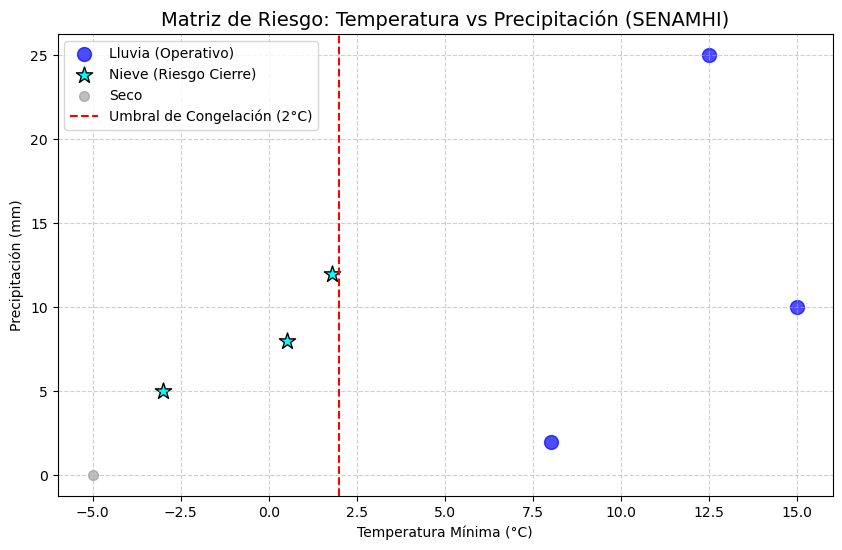

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def graficar_resultados():
    archivo = "reporte_final_clasificado.csv"
    
    if not os.path.exists(archivo):
        print("❌ Primero debes correr el Módulo 4 para generar el reporte.")
        return

    # Cargar datos
    df = pd.read_csv(archivo)
    
    print("📊 Generando Gráfico de Impacto Operativo...")

    # Separar datos por categoría para colorearlos diferente
    nieve = df[df["RESULTADO"].str.contains("NIEVE")]
    lluvia = df[df["RESULTADO"].str.contains("LLUVIA")]
    seco = df[df["RESULTADO"].str.contains("SECO")]

    plt.figure(figsize=(10, 6))

    # Ploteamos cada grupo
    plt.scatter(lluvia['TMIN'], lluvia['PP'], color='blue', label='Lluvia (Operativo)', s=100, alpha=0.7)
    plt.scatter(nieve['TMIN'], nieve['PP'], color='cyan', label='Nieve (Riesgo Cierre)', s=150, marker='*', edgecolors='black')
    plt.scatter(seco['TMIN'], seco['PP'], color='gray', label='Seco', s=50, alpha=0.5)

    # Línea de Umbral Crítico (Tu regla de negocio)
    plt.axvline(x=2.0, color='red', linestyle='--', label='Umbral de Congelación (2°C)')

    # Decoración del gráfico
    plt.title("Matriz de Riesgo: Temperatura vs Precipitación (SENAMHI)", fontsize=14)
    plt.xlabel("Temperatura Mínima (°C)")
    plt.ylabel("Precipitación (mm)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Guardar y Mostrar
    nombre_img = "GRAFICO_IMPACTO_CLIMATICO.png"
    plt.savefig(nombre_img)
    print(f"✅ Gráfico guardado como: {nombre_img}")
    plt.show()

if __name__ == "__main__":
    graficar_resultados()